In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [29]:
consumption_df = pd.read_csv('household_power_consumption.txt', sep=';')

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

In [30]:
consumption_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [31]:
consumption_df['Datetime'] = pd.to_datetime(consumption_df['Date'] + ' ' + consumption_df['Time'])

# You might want to drop the original Date and Time columns if they are no longer needed
consumption_df = consumption_df.drop(columns=['Date', 'Time'])

consumption_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [32]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [33]:
for col in consumption_df.columns:
    if consumption_df[col].dtype == 'object':
        consumption_df[col] = pd.to_numeric(consumption_df[col], errors='coerce')

In [34]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [35]:
consumption_df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [36]:
missing_data_rows = consumption_df[consumption_df['Global_active_power'].isnull()]

print(missing_data_rows.head())


       Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
6839                   NaN                    NaN      NaN               NaN   
6840                   NaN                    NaN      NaN               NaN   
19724                  NaN                    NaN      NaN               NaN   
19725                  NaN                    NaN      NaN               NaN   
41832                  NaN                    NaN      NaN               NaN   

       Sub_metering_1  Sub_metering_2  Sub_metering_3            Datetime  
6839              NaN             NaN             NaN 2006-12-21 11:23:00  
6840              NaN             NaN             NaN 2006-12-21 11:24:00  
19724             NaN             NaN             NaN 2006-12-30 10:08:00  
19725             NaN             NaN             NaN 2006-12-30 10:09:00  
41832             NaN             NaN             NaN 2007-01-14 18:36:00  


I will be interploating the missing values as for the time-series analysis is crucial to keep the sequence of the data - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

In [38]:
# Set the 'Datetime' column as the DataFrame index if it's not already
consumption_df.set_index('Datetime', inplace=True)

consumption_df.interpolate(method='time', inplace=True)

# Optionally, you can reset the index if you wish to have 'Datetime' as a regular column again
# consumption_df.reset_index(inplace=True)

print(consumption_df.isnull().sum())


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [43]:
consumption_df.tail(30)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2010-11-26 20:33:00,0.978,0.000,240.28,4.0,0.0,1.0,0.0
2010-11-26 20:34:00,0.968,0.000,237.57,4.0,0.0,1.0,0.0
2010-11-26 20:35:00,0.960,0.000,238.01,4.0,0.0,1.0,0.0
2010-11-26 20:36:00,0.964,0.000,238.07,4.0,0.0,1.0,0.0
2010-11-26 20:37:00,0.980,0.000,237.90,4.2,0.0,1.0,0.0
2010-11-26 20:38:00,0.976,0.096,236.97,4.0,0.0,2.0,0.0
2010-11-26 20:39:00,0.984,0.100,238.16,4.2,0.0,1.0,0.0
2010-11-26 20:40:00,0.986,0.102,238.92,4.2,0.0,1.0,0.0
2010-11-26 20:41:00,0.990,0.106,239.57,4.2,0.0,1.0,0.0


As focus will be only on forecasting the overall energy consumption, I will simplify the dataframe and will use only the relevant columns.

In [27]:
consumption_df_simplified = consumption_df[['Datetime', 'Global_active_power']].copy()

# Set 'Datetime' as the index
consumption_df_simplified.set_index('Datetime', inplace=True)

# Handle missing values. Here, we'll use forward fill as an example
consumption_df_simplified['Global_active_power'].fillna(method='ffill', inplace=True)

# Check the DataFrame
consumption_df_simplified.head()

KeyError: "['Datetime'] not in index"

<function matplotlib.pyplot.show(close=None, block=None)>

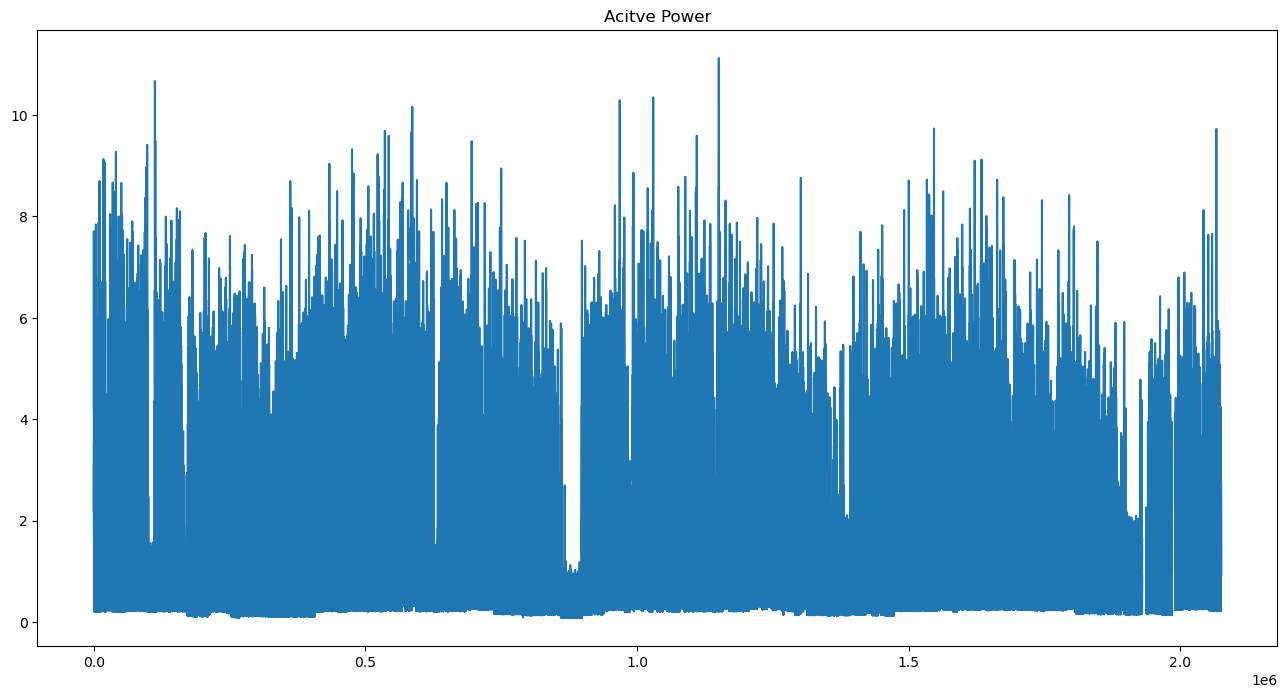

In [9]:
plt.figure(figsize=(16,8))
plt.title('Acitve Power')
plt.plot(consumption_df['Global_active_power'])
plt.show